In [107]:
# include everything

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
import keras.callbacks as callbacks
import time

import numpy as np
from keras.utils import np_utils

from sklearn import datasets
from sklearn import preprocessing

In [108]:
# Data Handlers


iris = datasets.load_iris()
data = iris.data
trgt = iris.target

# Now, the fit functions expects this labels to be encoded as one-hot vectors.
# In this case, this means we want a labels matrix with 50 rows, each row being
# [1, 0] (class 0) or [0, 1] (class 1).
# We'll use a util function to convert our labels vector to this format
trgt_sparse = np_utils.to_categorical(trgt)


In [19]:
data.shape

(150, 4)

In [138]:
# Create model and train
init_time = time.time()

model = Sequential()

model.add(Dense(30, input_dim=data.shape[1], init='uniform'))
model.add(Activation('tanh'))
model.add(Dense(trgt_sparse.shape[1], init='uniform')) 
model.add(Activation('tanh'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.7, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)

# Train model
earlyStopping = callbacks.EarlyStopping(monitor='trn_loss', 
                              patience=20, verbose=0, mode='auto')
trn_desc = model.fit(data, trgt_sparse, nb_epoch=50, batch_size=4, 
                     validation_split=0.1,callbacks=[earlyStopping])

print 'Time to create model and train: %1.3f seconds'%(time.time()-init_time)

Train on 135 samples, validate on 15 samples
Epoch 1/50
135/135 [==============================] - 0s - loss: 0.2524 - val_loss: 0.1992
Epoch 2/50
135/135 [==============================] - 0s - loss: 0.2097 - val_loss: 0.2400
Epoch 3/50
135/135 [==============================] - 0s - loss: 0.1885 - val_loss: 0.2219
Epoch 4/50
135/135 [==============================] - 0s - loss: 0.1589 - val_loss: 0.1747
Epoch 5/50
135/135 [==============================] - 0s - loss: 0.1360 - val_loss: 0.1793
Epoch 6/50
135/135 [==============================] - 0s - loss: 0.1242 - val_loss: 0.1777
Epoch 7/50
135/135 [==============================] - 0s - loss: 0.1199 - val_loss: 0.1663
Epoch 8/50
135/135 [==============================] - 0s - loss: 0.1191 - val_loss: 0.1738
Epoch 9/50
135/135 [==============================] - 0s - loss: 0.1176 - val_loss: 0.2138
Epoch 10/50
135/135 [==============================] - 0s - loss: 0.1167 - val_loss: 0.2135
Epoch 11/50
135/135 [=======================

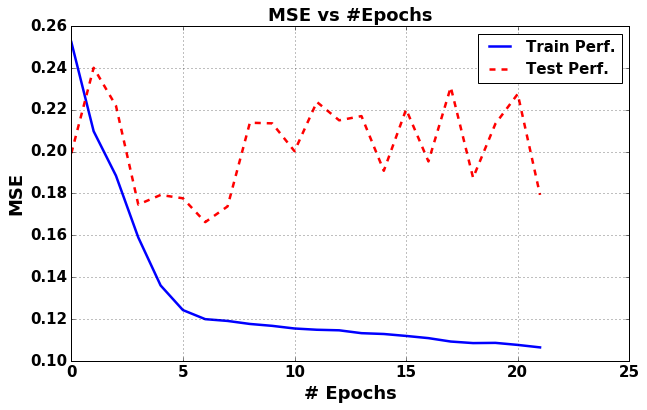

In [140]:
# plot train updates
import matplotlib.pyplot as plt
%matplotlib inline  

plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

plt.rc('legend',**{'fontsize':15})

plt.rc('font', weight='bold')

fig1 = plt.figure(figsize=(10,6))

l1 = plt.plot(trn_desc.epoch,
              trn_desc.history['loss'],color=[0,0,1],
              linewidth=2.5,linestyle='solid',label='Train Perf.')
l2 = plt.plot(trn_desc.epoch,
              trn_desc.history['val_loss'],color=[1,0,0],
              linewidth=2.5,linestyle='dashed',label='Test Perf.')

cost = ''
if model.loss == 'mean_squared_error':
    cost = 'MSE'

plt.grid(True)
plt.xlabel("# Epochs",fontsize=18,fontweight='bold')
plt.ylabel(cost,fontsize=18,fontweight='bold')
plt.title(cost+" vs #Epochs",fontsize=18,fontweight='bold')
plt.legend()